In [3]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Convert images to PyTorch tensors and then we normalize pixel values to [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [6]:
from torch.utils.data import Subset

# Download and load the training dataset
train_dataset = datasets.FashionMNIST(
    root='/content/gdrive/MyDrive/Lecture Notes & Study Materials/Practical Deep Learning using Pytorch/fashion_mnist',     # directory to store the data
    train=True,        # load training data
    download=True,     # download if not already downloaded
    transform=transform  # apply transform
)

# Load the test dataset
test_dataset = datasets.FashionMNIST(
    root='/content/gdrive/MyDrive/Lecture Notes & Study Materials/Practical Deep Learning using Pytorch/fashion_mnist',
    train=False,
    download=True,
    transform=transform
)
#Selecting 6000 instances for training
train_dataset= Subset(train_dataset, indices=range(6000))

#Selecting 6000 instances for training
test_dataset= Subset(train_dataset, indices=range(500))

In [7]:
label_names = [
    "T-shirt/top",  # 0
    "Trouser",      # 1
    "Pullover",     # 2
    "Dress",        # 3
    "Coat",         # 4
    "Sandal",       # 5
    "Shirt",        # 6
    "Sneaker",      # 7
    "Bag",          # 8
    "Ankle boot"    # 9
]

In [8]:
image, label = train_dataset[0]

Label: 0
It is a : T-shirt/top


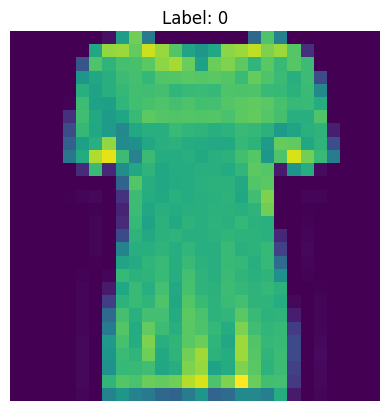

In [9]:
import matplotlib.pyplot as plt

def show_image(index):

    # Get a single sample using __getitem__
    img, label = train_dataset[index]  # change index as needed

    print("Label:", label)  # will print the class index (0–9)
    print("It is a :", label_names[label])

    # Plot the image (it's a single-channel grayscale)
    plt.imshow(img.squeeze())  # remove channel dimension with squeeze()
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

show_image(10)

In [10]:
# Wrap datasets in DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [11]:
def flatten_image(x):
  return x.view(x.shape[0], -1)

In [12]:
# create model class
import torch
import torch.nn as nn

class SimpleANN(nn.Module):
  def __init__(self, feature_size, num_classes):
    super().__init__()

    self.model=nn.Sequential(nn.Linear(feature_size,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64, num_classes),
    nn.Softmax(dim=1)) # Added dim=1 here

  def forward(self,x):
    x=self.model(x)
    return x

In [13]:
epochs=100
lr=0.1

In [14]:
temp=flatten_image(train_dataset[0][0])
num_features=temp.shape[1]

In [15]:
model=SimpleANN(num_features,10)

#defining loss
criterion=nn.CrossEntropyLoss()

#defining optimizer
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

In [16]:
print("Number of batches",len(train_loader))

Number of batches 94


In [17]:
#training loop

for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features, batch_labels in train_loader:
    #flatten_image
    flattend_features=flatten_image(batch_features)

    #forward pass
    outputs=model(flattend_features)

    #calculate loss
    loss=criterion(outputs, batch_labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update weights
    optimizer.step()

    total_epoch_loss+=loss.item()

  #printing the average loss
  average_loss=total_epoch_loss/len(train_loader)
  print(f"Epoch {epoch+1}/{epochs}, Loss: {average_loss}")

Epoch 1/100, Loss: 2.2658339916391577
Epoch 2/100, Loss: 2.0771240084729294
Epoch 3/100, Loss: 1.9002405861590772
Epoch 4/100, Loss: 1.7706499340686392
Epoch 5/100, Loss: 1.7298028989041105
Epoch 6/100, Loss: 1.7090741852496534
Epoch 7/100, Loss: 1.6986050567728408
Epoch 8/100, Loss: 1.6877366494625172
Epoch 9/100, Loss: 1.6805608234506972
Epoch 10/100, Loss: 1.6741664308182738
Epoch 11/100, Loss: 1.6697475047821695
Epoch 12/100, Loss: 1.6644752647014374
Epoch 13/100, Loss: 1.663905401179131
Epoch 14/100, Loss: 1.6608152795345226
Epoch 15/100, Loss: 1.65619972284804
Epoch 16/100, Loss: 1.654868077724538
Epoch 17/100, Loss: 1.6511880159378052
Epoch 18/100, Loss: 1.648863283877677
Epoch 19/100, Loss: 1.6476588566252526
Epoch 20/100, Loss: 1.6448858101317223
Epoch 21/100, Loss: 1.6462711260673848
Epoch 22/100, Loss: 1.6420110349959516
Epoch 23/100, Loss: 1.641227643540565
Epoch 24/100, Loss: 1.6394154099707907
Epoch 25/100, Loss: 1.6357001852481923
Epoch 26/100, Loss: 1.6385814572902435
E

In [18]:
with torch.no_grad():
  accuracy=0
  for batch_features,batch_labels in test_loader:
    flattend_features=flatten_image(batch_features)

    y_pred=model(flattend_features)
    y_pred=torch.argmax(y_pred,dim=1)
    correct = (y_pred == batch_labels).sum().item()
    accuracy=accuracy+correct

print("Testing Accuracy:",(accuracy/len(test_dataset))*100)

Testing Accuracy: 85.8


**Now let us check, how our trained model performes on the Training data instead of the test Data.**

In [19]:
with torch.no_grad():
  accuracy=0
  for batch_features,batch_labels in train_loader:
    flattend_features=flatten_image(batch_features)

    y_pred=model(flattend_features)
    y_pred=torch.argmax(y_pred,dim=1)
    correct = (y_pred == batch_labels).sum().item()
    accuracy=accuracy+correct

print("Training Model Accuracy:",(accuracy/len(train_dataset))*100)


Training Model Accuracy: 86.8


It can be seen this model is underfitting a little. Now if Say the training accuracy is 10% more than test accuracy then the Model will be a overfitted Model.

| **Strategies for Underfitting**                         | **Strategies for Overfitting**                           |
|----------------------------------------------------------|-----------------------------------------------------------|
| Increase model complexity (more layers/neurons)          | Add regularization (L2 weight decay)                      |
| Train for more epochs                                     | Use dropout layers                                        |
| Reduce regularization (lower dropout, weight decay)       | Apply early stopping                                      |
| Use better feature engineering or preprocessing           | Use data augmentation                                     |
| Use better activation functions (e.g., ReLU)              | Simplify model architecture                               |
| Reduce learning rate if diverging                         | Reduce training epochs                                    |
| Improve data quality or add relevant features             | Add noise to inputs or use label smoothing                |
|                                                           | Increase training data or use transfer learning           |


**Important Strategies in Overfitting**

### 🧠 Dropout in Neural Network Training

**What is Dropout?**  
Dropout is a regularization technique used to prevent overfitting in neural networks.  
During training, **random neurons are "dropped out" (i.e., temporarily deactivated)** with a certain probability.

---

### 🎯 Why Use Dropout?
- Neural networks with many parameters can easily **overfit** to the training data.
- Dropout forces the network to **not rely on any single neuron**, promoting **redundancy and robustness**.
- It acts like training an **ensemble of different subnetworks** and averaging their predictions.

---

### 🔢 How Dropout Works (Mathematically)

Let:
- `h` = activation of a neuron
- `r ~ Bernoulli(p)`, where `p` is the probability of **keeping** a neuron

Then during **training**:
- `h̃ = h * r`  
  If `r = 1`, neuron is kept  
  If `r = 0`, neuron is dropped

During **inference (testing)**:  
All neurons are used, but their outputs are **scaled by `p`** to maintain the expected value:

- `h_inference = p * h`



---

### 🔧 Example in PyTorch

```python
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(p=0.5),  # 50% dropout
    nn.Linear(64, 10)
)


### ==== Batch Normalization ====

**What is Batch Normalization?**  
Batch Normalization (often called **BatchNorm**) is a technique used in deep learning to make training **faster, more stable, and reliable**.

It works by **normalizing the inputs to each layer** so that they have a consistent distribution (mean ~0, variance ~1) during training.

---

### Why is Batch Normalization Needed?

- In deep networks, the inputs to each layer can change during training as earlier layers update. This is known as **internal covariate shift**.
- Such shifts can make training slow and unstable.
- BatchNorm fixes this by **standardizing the input to each layer**, reducing the sensitivity to weight initialization and allowing for **faster convergence**.
- It also acts as a kind of **regularizer**, reducing the need for dropout in some cases.

---

### ✅ Benefits of Batch Normalization

- **Faster training** (you can use higher learning rates)
- **Improved stability** during training
- **Better performance** on validation/test sets
- **Less dependency** on careful initialization
- Often **reduces overfitting**

---

### 🔧 PyTorch Example

```python
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(128, 64),
    nn.BatchNorm1d(64),  # Normalizes the 64 features, applied before activation fucntion
    nn.ReLU(),
    nn.Linear(64, 10)
)




### ✅ Regularization

**What is Regularization?**  
Regularization is a technique used in machine learning to **prevent overfitting** by **penalizing complex models**. It helps the model generalize better to unseen data. Mainly used to reduce the gap between training and testing.

---

### 🎯 Why is Regularization Needed? (Loss +Penalty)
- A model may learn noise or irrelevant patterns from training data.
- Regularization discourages the model from being too flexible or overly complex.

---

### 🔧 Regularization Strategies

| **Strategy**            | **Explanation (Simple)**                                                                   |
|-------------------------|---------------------------------------------------------------------------------------------|
| **L1 Regularization**   | Adds penalty equal to the **absolute value** of weights → encourages sparsity (zeros out weights) |
| **L2 Regularization**   | Adds penalty equal to the **square** of weights → keeps weights small but non-zero         |
| **Dropout**             | Randomly disables some neurons during training → prevents co-adaptation                    |
| **Early Stopping**      | Stops training when validation loss increases → avoids overfitting                         |
| **Data Augmentation**   | Creates variations of training data → improves generalization                              |
| **Weight Constraint**   | Limits how large weights can grow (e.g., max norm)                                         |

---

### 🧠 PyTorch Example of L2 Regularization

```python
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)



# 🔍 Hyperparameter Tuning Approaches in Deep Learning

Hyperparameter tuning is essential to improve the performance of deep learning models. Here, we discuss three important methods: **Grid Search**, **Random Search with Cross Validation**, and **Bayesian Optimization**, with a special focus on **Optuna**.

---

## 🔢 Grid Search

**Definition**: Grid Search performs an exhaustive search over a manually specified subset of the hyperparameter space. Every combination is trained and evaluated.

**Pros**:
- Simple and interpretable.
- Guarantees that all combinations are tested.

**Cons**:
- Computationally very expensive.
- Doesn’t scale well with dimensionality.
- May evaluate many irrelevant combinations.

**Example**:
```python
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64]
}


🎲 **Random Search with Cross Validation (Randomized CV)**
Definition: Random Search randomly samples combinations from specified ranges or distributions for a fixed number of iterations. When combined with Cross-Validation (CV), it gives a reliable estimate of model performance.

**Pros:**

a. More efficient than Grid Search.

b. Can find good parameters quickly.

c. Effective when only a few hyperparameters dominate performance.

**Cons:**

a. Results may vary run-to-run due to randomness.

b. Can miss good combinations if not enough samples.



📈 **Bayesian Optimization** <br/>
**Definition:** Bayesian Optimization builds a probabilistic model (like a Gaussian Process) to estimate the objective function and uses this model to choose the most promising hyperparameter combinations.

**📌 Key Steps:** <br/>
a. Surrogate Model: Approximates the performance function (e.g., validation loss).

b. Acquisition Function: Selects next best hyperparameter set to try (e.g., Expected Improvement).

c. Model Update: Incorporates new trial results into the surrogate.

d. Iteration: Repeat to converge towards the optimal values.

**Pros:**

a. Very sample-efficient.

b. Intelligent exploration and exploitation.

c. Suitable for expensive models where each run is costly.

**Cons:**

a. More complex to implement.

b. Slower per iteration than random/grid search.



## ⚙️ Optuna: A Powerful Framework for Bayesian Optimization

Optuna is an open-source hyperparameter optimization framework built for efficiency and flexibility.

### 🔧 Features:
- **Define-by-Run API**: Hyperparameters are defined dynamically during execution.
- **Efficient Sampling**: Uses Tree-structured Parzen Estimator (TPE), a form of Bayesian Optimization.
- **Pruning**: Stops poorly performing trials early based on intermediate results.
- **Visualization**: Provides plots for optimization history, parameter importance, parallel coordinates, etc.
- **Multi-objective optimization**: Supports optimizing multiple metrics simultaneously.



## 📌 Key Questions During Hyperparameter Tuning in Deep Learning

While tuning a deep learning model, several critical hyperparameters must be evaluated and optimized. The following are the most commonly tuned elements:

1. **Number of Hidden Layers**  
   - How many layers should the model have?
   - Deeper networks can capture more complex features but risk overfitting.

2. **Neurons per Layer**  
   - How many neurons should be in each hidden layer?
   - More neurons allow higher capacity but increase computation and overfitting risk.

3. **Number of Epochs**  
   - For how many iterations should the model be trained?
   - Too few may underfit; too many may overfit. Early stopping can help.

4. **Optimizer**  
   - Which optimization algorithm to use? (e.g., SGD, Adam, RMSprop)
   - Different optimizers may converge faster or handle sparse gradients better.

5. **Learning Rate**  
   - The step size for weight updates during training.
   - A crucial hyperparameter — too high can overshoot, too low can slow down learning.

6. **Batch Size**  
   - Number of samples processed before the model is updated.
   - Affects training stability, speed, and generalization.

7. **Dropout Rate**  
   - Fraction of neurons randomly dropped during training to prevent overfitting.
   - Commonly set between 0.2 to 0.5.

8. **Weight Decay (L2 Regularization / λ)**  
   - Penalizes large weights by adding a regularization term to the loss.
   - Helps reduce overfitting; finding the optimal λ value is critical.

---

Each of these parameters influences the training dynamics and final model performance. Hyperparameter tuning aims to find the optimal combination that minimizes validation loss or maximizes validation accuracy.


**==========OPTUNA Hyperparmeter Tuning==========**

# 🎯 Hyperparameter Tuning with Optuna – Step-by-Step Guide

Optuna is a modern hyperparameter optimization framework that automates the process of finding the best set of hyperparameters. It uses Bayesian Optimization (TPE) to search the space efficiently.

---

## 🔄 How Optuna Works

1. **Define Objective Function**  
   This function contains:
   - Hyperparameter definitions using `trial.suggest_*`
   - Model definition and training
   - Performance evaluation
   - Returns the metric to optimize (accuracy, loss, etc.)

2. **Search Space**  
   Define the space of possible values for each hyperparameter dynamically.

3. **Model Initialization**  
   Use the sampled hyperparameters to create your model (e.g., hidden size, dropout).

4. **Training Loop**  
   Train your model using PyTorch (or another framework) with standard loops.

5. **Evaluation Loop**  
   Evaluate the model on a validation set using accuracy or loss.

6. **Create and Run Study**  
   Use `optuna.create_study()` and `study.optimize()` to start optimization.

---

## ✅ What We Tune

- **Hidden Size**: Number of neurons in hidden layer.
- **Dropout Rate**: Randomly zero out neurons to prevent overfitting.
- **Learning Rate**: Step size for optimizer.
- **Batch Size**: Number of samples per batch.
- **Weight Decay**: L2 regularization (λ).

---

## 📋 Summary Table

| Step | Description |
|------|-------------|
| 🎛️ Search Space | Defined using `trial.suggest_int`, `suggest_float`, etc. |
| 🧠 Model Init | Model is built dynamically inside the `objective()` |
| 🔧 Param Init | Hyperparameters sampled from user-defined ranges |
| 🔁 Training | Typical PyTorch loop with `optimizer.step()` and `loss.backward()` |
| 🧪 Evaluation | Use validation set accuracy/loss as optimization goal |
| 🚀 Optimization | Optuna runs the above process over multiple trials |

---

## 📌 Why Use Optuna?

- Define-by-run API (more flexible than static grid)
- Fast and efficient with Tree-structured Parzen Estimator (TPE)
- Built-in pruning to stop bad trials early
- Easy integration with PyTorch, TensorFlow, XGBoost, etc.
- Great visualizations and reporting tools

---

### 🧪 Sample Code Structure Overview:

```python
def objective(trial):
    # 1. Sample hyperparameters  <--- The function at the input gets a  trail object.
    # We define multiple things, we define the lowest and the highest range.
    # hidden layer size will vary from 16-128, same for others.
    hidden_size = trial.suggest_int('hidden_size', 16, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-2, log=True)

    # 2. Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # 3. Define model < --- Model Initialization
    model = nn.Sequential(
        nn.Linear(input_dim, hidden_size),
        nn.ReLU(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_size, 2)
    )

    # 4. Define loss and optimizer  <-- Parameter Initialization
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # 5. Training loop   <--- The iterative training loop
    for epoch in range(20):
        for xb, yb in train_loader:
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

    # 6. Evaluation   <--- Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            predicted = torch.argmax(preds, dim=1)
            correct += (predicted == yb).sum().item()
            total += yb.size(0)

    accuracy = correct / total
    return accuracy   #<-- at last it is returning the trail accuracy.

# So this function or method is getting optuna trail object, and for the particular trail what is the accuracy we got.




## 🎯 What is a `study` in Optuna?

In Optuna, a **`study`** is the main object that manages the entire hyperparameter optimization process.

### 🔧 Key Roles of `study`:
- Defines the **direction** of optimization (maximize or minimize)
- Manages all **trials** (each trial is one evaluation of hyperparameters)
- Tracks the **best result** and **best parameters**
- Controls how new hyperparameters are sampled

---

### ✅ Create a Study
```python
study = optuna.create_study(direction="maximize")

---

### 🔁 Run Optimization
```python
study.optimize(objective, n_trials=50)

---
study.best_value      # Best score (e.g., highest accuracy)
study.best_params     # Best hyperparameter combination
study.best_trial      # Full details of the best trial (value, params, duration, etc.)

### 🧠 Summary Table

| Term               | Description                                        |
|--------------------|----------------------------------------------------|
| `study`            | Manages the entire hyperparameter tuning process   |
| `trial`            | A single run using one set of hyperparameters      |
| `study.optimize()` | Runs multiple trials to find the best parameters   |
| `study.best_value` | Best score (e.g., highest accuracy or lowest loss) |
| `study.best_params`| Hyperparameters that gave the best score           |
| `study.best_trial` | Complete info of the best trial (value + params)   |


<hr style="height:4px; background-color:#000000; border:none;" />
<hr style="height:4px; background-color:#000000; border:none;" />
<h1 style="color:#1E90FF;">🔵 Neural Network Optimization Coding using Optuna</h2>



In [44]:
# create model class
import torch
import torch.nn as nn

class MyNN(nn.Module):
  def __init__(self, feature_size, num_classes, num_hidden_layers,neurons_per_layer):
    super().__init__()
    layers=[]
    input_layer_count=feature_size
    for i in range(num_hidden_layers):

        layers.append(nn.Linear(input_layer_count,neurons_per_layer))
        layers.append(nn.BatchNorm1d(neurons_per_layer))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(0.3))
        input_layer_count=neurons_per_layer


    layers.append(nn.Linear(neurons_per_layer,num_classes))
    #layers.append(nn.Softmax(dim=1))

    self.model=nn.Sequential(*layers) #unpacking the list
                    #nn.Sequential(*[l1, l2, l3])  ≡  nn.Sequential(l1, l2, l3)

  def forward(self,x):
    x=self.model(x)
    return x

In [48]:
def objective(trail):

  #next hyperparameter values from the search space
  num_hidden_layers= trail.suggest_int("num_hidden_layers",1,5)
  neurons_per_layer=trail.suggest_int("num_per_layers",8,128,step=8)

  #model init
  input_dim=784
  output_dim=10

  model=MyNN(input_dim, output_dim, num_hidden_layers,neurons_per_layer)
  #Initialization rest of the parameters
  learning_rate=0.01
  epochs=50
  #Select the optimizer
  criterion=nn.CrossEntropyLoss()
  optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate, weight_decay=1e-4)
  #Run the Training Loop

  for epoch in range(epochs):
    #total_epoch_loss=0

    for batch_features, batch_labels in train_loader:
      flatten_data=flatten_image(batch_features)
      output=model(flatten_data)
      loss=criterion(output,batch_labels)
      optimizer.zero_grad()
      loss.backward()

      optimizer.step()



  #Run Evaluation

  with torch.no_grad():
    accuracy=0
    for batch_features,batch_labels in test_loader:
      flattend_features=flatten_image(batch_features)

      y_pred=model(flattend_features)
      y_pred=torch.argmax(y_pred,dim=1)
      correct = (y_pred == batch_labels).sum().item()
      accuracy=accuracy+correct

  accuracy=(accuracy/len(test_dataset))*100

  return accuracy


In [ ]:
!pip install optuna

In [49]:
#Creating a study to use the objective

import optuna

study=optuna.create_study(direction='maximize')


[I 2025-07-08 20:42:18,140] A new study created in memory with name: no-name-b60a013c-6ff8-41f0-9b69-4d1a1d65b871


In [50]:
study.optimize(objective, n_trials=5)

[I 2025-07-08 20:44:11,971] Trial 0 finished with value: 89.8 and parameters: {'num_hidden_layers': 4, 'num_per_layers': 120}. Best is trial 0 with value: 89.8.
[I 2025-07-08 20:45:54,697] Trial 1 finished with value: 77.60000000000001 and parameters: {'num_hidden_layers': 4, 'num_per_layers': 40}. Best is trial 0 with value: 89.8.
[I 2025-07-08 20:47:32,461] Trial 2 finished with value: 93.4 and parameters: {'num_hidden_layers': 1, 'num_per_layers': 88}. Best is trial 2 with value: 93.4.
[I 2025-07-08 20:49:06,924] Trial 3 finished with value: 90.2 and parameters: {'num_hidden_layers': 1, 'num_per_layers': 40}. Best is trial 2 with value: 93.4.
[I 2025-07-08 20:50:51,020] Trial 4 finished with value: 89.60000000000001 and parameters: {'num_hidden_layers': 3, 'num_per_layers': 88}. Best is trial 2 with value: 93.4.


In [51]:
study.best_value

93.4

In [52]:
study.best_params

{'num_hidden_layers': 1, 'num_per_layers': 88}